In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

%matplotlib inline

# Cargamos el modelo y el test final

In [101]:
modelo = pd.read_csv('csv_files/modelo_final.csv')
test_final = pd.read_csv('csv_files/test_final.csv')

C:\Users\Francisco\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [102]:
modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo
765719,1112441194,52KRAX,3.0,2,4.0,0.0,KEY ACCOUNT MANAGER,10,3,3,Comercial,0.0
2813782,1111218850,Rzr8b6x,1.0,1,4.0,1.0,Mucama eventual para importante Hotel 5 estrellas,10,3,3,Hotelería,1.0
964077,1112208757,Pm4xDG0,2.0,2,4.0,1.0,Repositor externo Zona Norte,10,3,3,Almacén / Depósito / Expedición,0.0
394587,1111532043,5md1aAN,2.0,1,4.0,0.0,Vigiladores para Locales Comerciales,10,3,3,Seguridad,0.0
264292,1112450387,owzxY3a,1.0,1,2.0,0.0,Ingeniero de Procesos Logísticos. Zarate.,10,2,3,Ingeniería Industrial,0.0


In [103]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 12 columns):
idaviso            int64
idpostulante       object
rango_edad         float64
sexo               int64
nivel_estudios     float64
esta_estudiando    float64
titulo             object
tipo_de_trabajo    int64
nivel_laboral      int64
nombre_zona        int64
nombre_area        object
sepostulo          float64
dtypes: float64(4), int64(5), object(3)
memory usage: 274.7+ MB


In [104]:
test_final.sample(5)

,id,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area
98283,98283,1112505477,EON980,4.0,1.0,3.0,0.0,10,3,3,Call Center
63424,63424,1112457467,qevz3MR,2.0,2.0,2.0,0.0,10,3,3,Gastronomia
52852,52852,1112444023,owjXrJL,4.0,1.0,2.0,0.0,10,3,2,Producción
7432,7432,1111709950,akbRmaZ,1.0,1.0,4.0,1.0,9,3,2,Call Center
32337,32337,1112393314,811XJO,3.0,2.0,4.0,1.0,10,2,3,Impuestos


In [105]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
id                 100000 non-null int64
idaviso            100000 non-null int64
idpostulante       100000 non-null object
rango_edad         100000 non-null float64
sexo               100000 non-null float64
nivel_estudios     100000 non-null float64
esta_estudiando    100000 non-null float64
tipo_de_trabajo    100000 non-null int64
nivel_laboral      100000 non-null int64
nombre_zona        100000 non-null object
nombre_area        100000 non-null object
dtypes: float64(4), int64(4), object(3)
memory usage: 8.4+ MB


Nos guardamos en un dataframe alternativo todos los registros con postulaciones efectivas del postulante al aviso en cuestión.

In [106]:
si = modelo['sepostulo'] == 1
no = modelo['sepostulo'] == 0
modelo_si = modelo[si]
modelo_no = modelo[no]

# Correlación de Pearson entre los features

Text(0.5,1,'Correlación de Pearson entre los features')

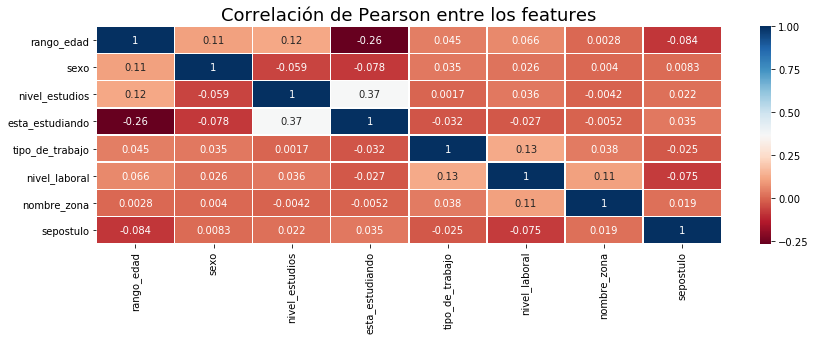

In [55]:
modelo_features = modelo[['rango_edad', 'sexo', 'nivel_estudios', 'esta_estudiando',\
                          'tipo_de_trabajo', 'nivel_laboral', 'nombre_zona', 'sepostulo']]

fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(modelo_features.astype(float).corr(), cmap=plt.cm.RdBu, robust=False, annot=True,\
                      linewidths=.5, linecolor='white', ax=ax)

heatmap.set_title('Correlación de Pearson entre los features', fontsize=18)

# Features de avisos vs Features de postulantes

En esta sección, realizamos "enfrentamientos" entre distintos features de los avisos con distintos features de los postulantes.

En un principio, la idea fue lograr una tabla que mostrara en porcentajes la cantidad de registros en los que se cumplía cada combinación de valores entre los dos features. De esta forma, creamos un nuevo feature que contenía el peso (porcentaje) de la combinación que se daba en el registro en cuestión. Cuando llevamos esto a los algoritmos de ML, los resultados empeoraron, por lo cual decidimos dejarlo de lado.

Luego, en vez de analizar todas las combinaciones de valores para cada par de features, le dimos importancia a aquellas relaciones que más peso tenían. Es decir, que a priori parecían influir en la decisión de un postulante de postularse o no a un cierto aviso. Por más fino que fue el análisis, los resultados tampoco mejoraron y, nuevamente, lo dejamos de lado.

Sin embargo, a continuación, mostramos los procedimientos realizados, ya que los consideramos importantes en el desarrollo del TP.

## Nivel de estudios vs Nivel laboral

Nivel de estudios:
- 1 = Otro
- 2 = Secundario
- 3 = Terciario/Técnico
- 4 = Universitario
- 5 = Posgrado
- 6 = Master
- 7 = Doctorado

Nivel laboral:
- 1 = Otro
- 2 = Junior
- 3 = Senior / Semi-Senior
- 4 = Jefe / Supervisor / Responsable
- 5 = Gerencia / Alta Gerencia / Dirección

#### Analizamos las postulaciones

Creamos un dataframe con porcentajes por columnas. De esta forma, el heatmap nos mostrará mejor la incidencia de cada nivel de estudios para cada nivel laboral.

In [31]:
estudios_vs_laboral_si = pd.crosstab(modelo_si['nivel_laboral'], modelo_si['nivel_estudios'], normalize='columns')
estudios_vs_laboral_si

nivel_estudios,1.0,2.0,3.0,4.0,5.0,6.0,7.0
nivel_laboral,,,,,,,
1,0.123427,0.109185,0.089737,0.068507,0.049208,0.041116,0.063852
2,0.182975,0.205458,0.222439,0.246602,0.171721,0.156883,0.181003
3,0.675706,0.665861,0.659570,0.640946,0.666470,0.656865,0.654354
4,0.014957,0.016949,0.023714,0.035489,0.082251,0.096472,0.075989
5,0.002935,0.002547,0.004540,0.008455,0.030350,0.048663,0.024802


Text(105,0.5,'Nivel laboral')

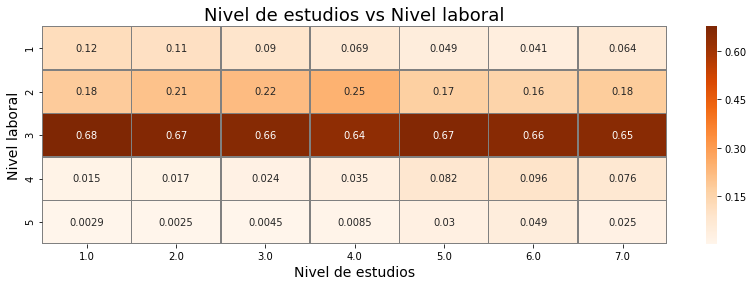

In [69]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(estudios_vs_laboral_si, cmap='Oranges', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Nivel de estudios vs Nivel laboral', fontsize=18)
heatmap.set_xlabel('Nivel de estudios', fontsize=14)
heatmap.set_ylabel('Nivel laboral', fontsize=14)

#### Analizamos las no postulaciones

In [33]:
estudios_vs_laboral_no = pd.crosstab(modelo_no['nivel_laboral'], modelo_no['nivel_estudios'], normalize='columns')
estudios_vs_laboral_no

nivel_estudios,1.0,2.0,3.0,4.0,5.0,6.0,7.0
nivel_laboral,,,,,,,
1,0.077521,0.079189,0.079429,0.079118,0.078255,0.078328,0.077519
2,0.163150,0.165018,0.166005,0.166250,0.167308,0.163400,0.169089
3,0.684289,0.681375,0.680000,0.680711,0.679745,0.680491,0.674903
4,0.060975,0.061434,0.061538,0.061131,0.062184,0.064990,0.065891
5,0.014065,0.012983,0.013028,0.012791,0.012508,0.012791,0.012597


Text(105,0.5,'Nivel laboral')

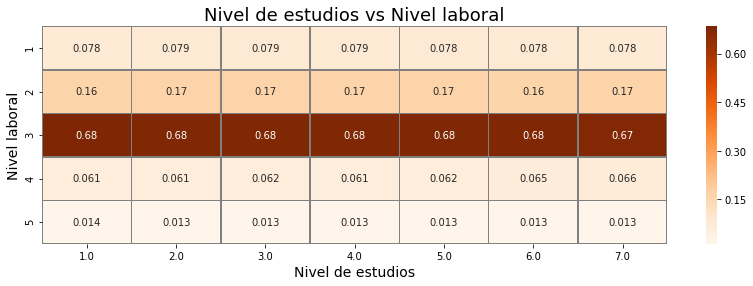

In [70]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(estudios_vs_laboral_no, cmap='Oranges', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Nivel de estudios vs Nivel laboral', fontsize=18)
heatmap.set_xlabel('Nivel de estudios', fontsize=14)
heatmap.set_ylabel('Nivel laboral', fontsize=14)

#### Conclusión

Ambos heatmaps son muy similares. No encontramos relaciones inversas entre uno y otro. Esto quiere decir que la combinación entre el nivel de estudios del postulante y el nivel laboral del aviso no influyen en la decisión de postularse o no.

## Esta estudiando vs Tipo de trabajo

Esta estudiando:
- 0 = Está graduado o abandonó
- 1 = Tiene un título en curso

Tipo de trabajo:
- 1 = Voluntario
- 2 = Primer Empleo
- 3 = Fines de Semana
- 4 = Por Contrato
- 5 = Temporario
- 6 = Pasantia
- 7 = Por Horas
- 8 = Teletrabajo
- 9 = Part-time
- 10 = Full-time

#### Analizamos las postulaciones

In [35]:
estudiando_vs_tipo_trabajo_si = pd.crosstab(modelo_si['esta_estudiando'], modelo_si['tipo_de_trabajo'], normalize='columns')
estudiando_vs_tipo_trabajo_si

tipo_de_trabajo,1,2,3,4,5,6,7,8,9,10
esta_estudiando,,,,,,,,,,
0.0,0.716418,0.524237,0.663201,0.638065,0.692404,0.269759,0.709831,0.615047,0.533763,0.652831
1.0,0.283582,0.475763,0.336799,0.361935,0.307596,0.730241,0.290169,0.384953,0.466237,0.347169


Text(105,0.5,'Esta estudiando')

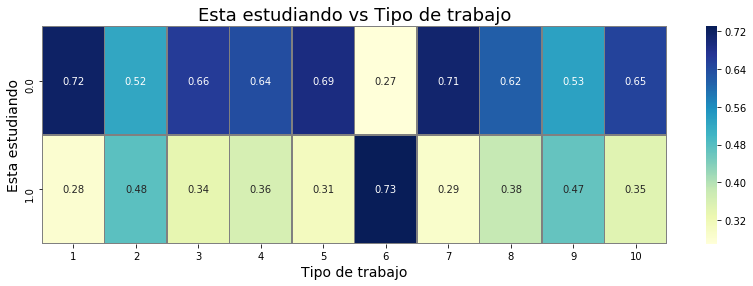

In [71]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(estudiando_vs_tipo_trabajo_si, cmap='YlGnBu', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Esta estudiando vs Tipo de trabajo', fontsize=18)
heatmap.set_xlabel('Tipo de trabajo', fontsize=14)
heatmap.set_ylabel('Esta estudiando', fontsize=14)

#### Analizamos las no postulaciones

In [37]:
estudiando_vs_tipo_trabajo_no = pd.crosstab(modelo_no['esta_estudiando'], modelo_no['tipo_de_trabajo'], normalize='columns')
estudiando_vs_tipo_trabajo_no

tipo_de_trabajo,1,2,3,4,5,6,7,8,9,10
esta_estudiando,,,,,,,,,,
0.0,0.625,0.677871,0.642512,0.667228,0.663396,0.676862,0.675901,0.666111,0.666135,0.66869
1.0,0.375,0.322129,0.357488,0.332772,0.336604,0.323138,0.324099,0.333889,0.333865,0.33131


Text(105,0.5,'Esta estudiando')

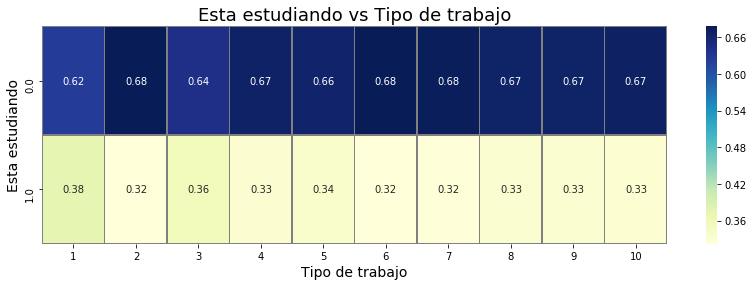

In [72]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(estudiando_vs_tipo_trabajo_no, cmap='YlGnBu', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Esta estudiando vs Tipo de trabajo', fontsize=18)
heatmap.set_xlabel('Tipo de trabajo', fontsize=14)
heatmap.set_ylabel('Esta estudiando', fontsize=14)

#### Conclusión

Luego de analizar ambos heatmaps, notamos una única relación inversa entre ambos:
- Si un postulante no está estudiando, es poco probable que se postule a una pasantía (tipo_de_trabajo = 6)
- Si un postulante está estudiando, es muy probable que se postule a una pasantía (tipo_de_trabajo = 6)

Creamos entonces el feature que indica esta relación.

In [39]:
relacion = (modelo['esta_estudiando'] == 1) & (modelo['tipo_de_trabajo'] == 6)

#modelo.loc[(relacion), 'estudia_vs_tipo_de_trabajo'] = 1
#modelo.loc[(~relacion), 'estudia_vs_tipo_de_trabajo'] = 0

modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo,estudia_vs_tipo_de_trabajo
196910,1111746048,wVYaRmm,3.0,1,2.0,0.0,OPERARIOS DE PRODUCCION ZONA NORTE (TALAR DE P...,10,1,3,Producción,0.0,0.0
2192880,1112445738,ekO6xGW,1.0,1,2.0,0.0,Operario de Limpieza,10,1,3,Mantenimiento y Limpieza,1.0,0.0
777908,1112455332,ZjlOWP,3.0,2,4.0,1.0,OPERADORES TELEFÓNICOS ATENCIÓN AL CLIENTE,9,3,3,Atención al Cliente,0.0,0.0
713408,1111983737,akbMaNN,3.0,2,4.0,1.0,Ingeniero Acceso FTTH,10,3,3,Telecomunicaciones,0.0,0.0
1772984,1112396257,5JmOON,3.0,1,3.0,0.0,Ejecutiva de cuenta plan de ahorro - TOYOTA,10,3,3,Comercial,1.0,0.0


## Rango de edad vs Tipo de trabajo

Rango de edad:
- 1 = 18-25 
- 2 = 26-30
- 3 = 31-40
- 4 = 41-68

Tipo de trabajo:
- 1 = Voluntario
- 2 = Primer Empleo
- 3 = Fines de Semana
- 4 = Por Contrato
- 5 = Temporario
- 6 = Pasantia
- 7 = Por Horas
- 8 = Teletrabajo
- 9 = Part-time
- 10 = Full-time

#### Analizamos las postulaciones

In [40]:
edad_vs_tipo_trabajo_si = pd.crosstab(modelo_si['rango_edad'], modelo_si['tipo_de_trabajo'], normalize='columns')
edad_vs_tipo_trabajo_si

tipo_de_trabajo,1,2,3,4,5,6,7,8,9,10
rango_edad,,,,,,,,,,
1.0,0.507463,0.707361,0.464738,0.243268,0.317907,0.623976,0.361668,0.376803,0.502475,0.315631
2.0,0.298507,0.179533,0.284358,0.321771,0.311368,0.255617,0.295531,0.263950,0.258020,0.303266
3.0,0.179104,0.095153,0.199819,0.322227,0.280936,0.104282,0.257001,0.270846,0.185413,0.279301
4.0,0.014925,0.017953,0.051085,0.112734,0.089789,0.016125,0.085799,0.088401,0.054093,0.101802


Text(105,0.5,'Rango edad')

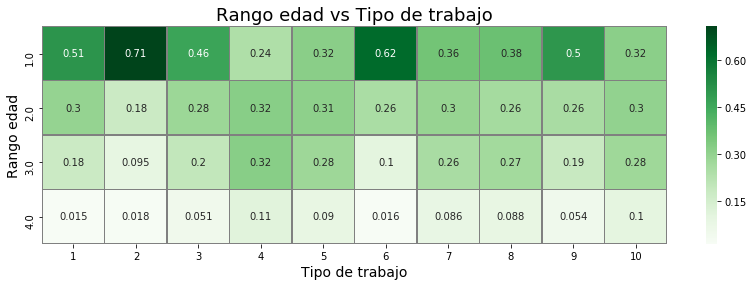

In [73]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(edad_vs_tipo_trabajo_si, cmap='Greens', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Rango edad vs Tipo de trabajo', fontsize=18)
heatmap.set_xlabel('Tipo de trabajo', fontsize=14)
heatmap.set_ylabel('Rango edad', fontsize=14)

#### Analizamos las no postulaciones

In [42]:
edad_vs_tipo_trabajo_no = pd.crosstab(modelo_no['rango_edad'], modelo_no['tipo_de_trabajo'], normalize='columns')
edad_vs_tipo_trabajo_no

tipo_de_trabajo,1,2,3,4,5,6,7,8,9,10
rango_edad,,,,,,,,,,
1.0,0.410714,0.308123,0.312198,0.301685,0.305472,0.296941,0.300296,0.301261,0.303623,0.303376
2.0,0.214286,0.274510,0.253623,0.254869,0.256415,0.268621,0.263448,0.257156,0.258447,0.257268
3.0,0.303571,0.282913,0.292271,0.284270,0.287170,0.290144,0.288058,0.292253,0.290765,0.291148
4.0,0.071429,0.134454,0.141908,0.159176,0.150943,0.144293,0.148198,0.149329,0.147165,0.148208


Text(105,0.5,'Rango edad')

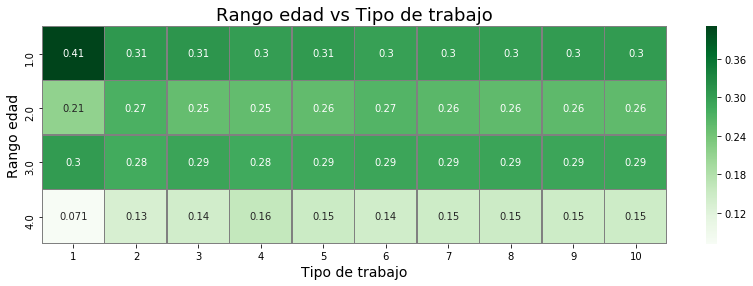

In [74]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(edad_vs_tipo_trabajo_no, cmap='Greens', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Rango edad vs Tipo de trabajo', fontsize=18)
heatmap.set_xlabel('Tipo de trabajo', fontsize=14)
heatmap.set_ylabel('Rango edad', fontsize=14)

#### Conclusión

Luego de analizar ambos heatmaps, notamos las siguientes relaciones inversas:
- Si un postulante tiene entre 18 y 25 años (rango_edad = 1), es muy probable que se postule a un primer empleo (tipo_de_trabajo = 2)
- Si un postulante no tiene entre 18 y 25 años (rango_edad =1), es poco probable que se postule a un primer emepleo (tipo_de_trabajo = 2) 

- Si un postulante tiene entre 18 y 25 años (rango_edad = 1), es bastante probable que se postule a una pasantía (tipo_de_trabajo = 6)
- Si un postulante no tiene entre 18 y 25 años (rango_edad =1), es menos probable que se postule a una pasantía (tipo_de_trabajo = 6)

Creamos entonces el feature que indica estas relaciones.

In [76]:
relacion = ((modelo['rango_edad'] == 1) & (modelo['tipo_de_trabajo'] == 2)) |\
           ((modelo['rango_edad'] == 1) & (modelo['tipo_de_trabajo'] == 6))

#modelo.loc[(relacion), 'edad_vs_tipo_de_trabajo'] = 1
#modelo.loc[(~relacion), 'edad_vs_tipo_de_trabajo'] = 0

modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo,estudia_vs_tipo_de_trabajo,edad_vs_tipo_de_trabajo
1348855,1112246510,dYjZKGD,1.0,2,2.0,0.0,Jefe de Payroll,10,3,3,Administración de Personal,0.0,0.0,0.0
2962136,1112266076,RzM6NkY,4.0,1,4.0,0.0,Responsable de Cuenta Sr. - Gerencia de Desarr...,10,3,3,Desarrollo de Negocios,1.0,0.0,0.0
2592397,1112349451,DrJLlr5,1.0,1,3.0,0.0,Cajera/o (Córdoba Norte),10,2,3,Créditos y Cobranzas,1.0,0.0,0.0
1171352,1112485025,0zN2Mm1,2.0,2,2.0,0.0,28/04: Online Hiring Tournament - L1 Customer ...,8,2,3,Soporte Técnico,0.0,0.0,0.0
1139136,1112305607,6rZxk3x,1.0,2,2.0,0.0,Jefe logístico de Planta - Zona Magdalena,10,3,3,Logística,0.0,0.0,0.0


## Rango de edad vs Nombre zona

Rango de edad:
- 1 = 18-25 
- 2 = 26-30
- 3 = 31-40
- 4 = 41-68

Nombre zona:
- 1 = Otros
- 2 = Capital Federal
- 3 = Gran Buenos Aires

#### Analizamos las postulaciones

In [44]:
edad_vs_zona_si = pd.crosstab(modelo_si['rango_edad'], modelo_si['nombre_zona'], normalize='columns')
edad_vs_zona_si

nombre_zona,2,3
rango_edad,,
1.0,0.358279,0.342268
2.0,0.296940,0.296693
3.0,0.255237,0.266047
4.0,0.089543,0.094992


Text(105,0.5,'Rango edad')

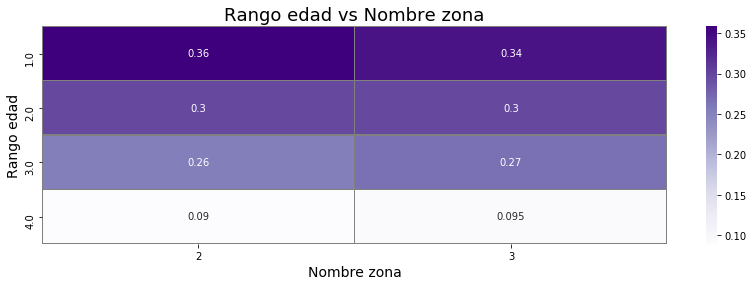

In [77]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(edad_vs_zona_si, cmap='Purples', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Rango edad vs Nombre zona', fontsize=18)
heatmap.set_xlabel('Nombre zona', fontsize=14)
heatmap.set_ylabel('Rango edad', fontsize=14)

#### Analizamos las no postulaciones

In [46]:
edad_vs_zona_no = pd.crosstab(modelo_no['rango_edad'], modelo_no['nombre_zona'], normalize='columns')
edad_vs_zona_no

nombre_zona,1,2,3
rango_edad,,,
1.0,0.315496,0.303783,0.303298
2.0,0.246377,0.256866,0.257474
3.0,0.275362,0.290283,0.291150
4.0,0.162765,0.149068,0.148078


Text(105,0.5,'Rango edad')

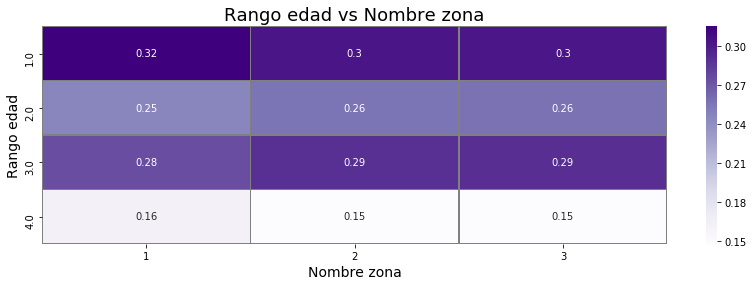

In [78]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(edad_vs_zona_no, cmap='Purples', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Rango edad vs Nombre zona', fontsize=18)
heatmap.set_xlabel('Nombre zona', fontsize=14)
heatmap.set_ylabel('Rango edad', fontsize=14)

#### Conclusión

No encontramos grandes diferencias entre ambos heatmaps. No podemos traducir esto a una relación binaria.

## Rango de edad vs Nivel laboral

Rango de edad:
- 1 = 18-25 
- 2 = 26-30
- 3 = 31-40
- 4 = 41-68

Nivel laboral:
- 1 = Otro
- 2 = Junior
- 3 = Senior / Semi-Senior
- 4 = Jefe / Supervisor / Responsable
- 5 = Gerencia / Alta Gerencia / Dirección

#### Analizamos las postulaciones

In [79]:
edad_vs_nivel_laboral_si = pd.crosstab(modelo_si['rango_edad'], modelo_si['nivel_laboral'], normalize='columns')
edad_vs_nivel_laboral_si

nivel_laboral,1,2,3,4,5
rango_edad,,,,,
1.0,0.388228,0.399948,0.330349,0.142389,0.104423
2.0,0.291724,0.310082,0.297136,0.235842,0.163303
3.0,0.242923,0.230538,0.274268,0.371527,0.343278
4.0,0.077125,0.059432,0.098247,0.250243,0.388996


Text(105,0.5,'Edad')

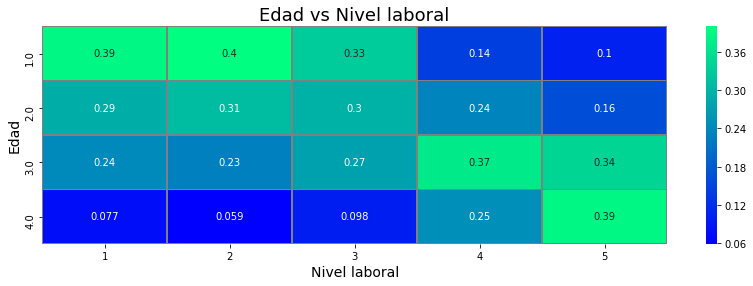

In [88]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(edad_vs_nivel_laboral_si, cmap='winter', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Edad vs Nivel laboral', fontsize=18)
heatmap.set_xlabel('Nivel laboral', fontsize=14)
heatmap.set_ylabel('Edad', fontsize=14)

#### Analizamos las no postulaciones

In [89]:
edad_vs_nivel_laboral_no = pd.crosstab(modelo_no['rango_edad'], modelo_no['nivel_laboral'], normalize='columns')
edad_vs_nivel_laboral_no

nivel_laboral,1,2,3,4,5
rango_edad,,,,,
1.0,0.305368,0.303558,0.303108,0.303284,0.300843
2.0,0.258251,0.256773,0.257710,0.255186,0.255988
3.0,0.290067,0.291457,0.290775,0.293731,0.295411
4.0,0.146314,0.148212,0.148408,0.147799,0.147757


Text(105,0.5,'Edad')

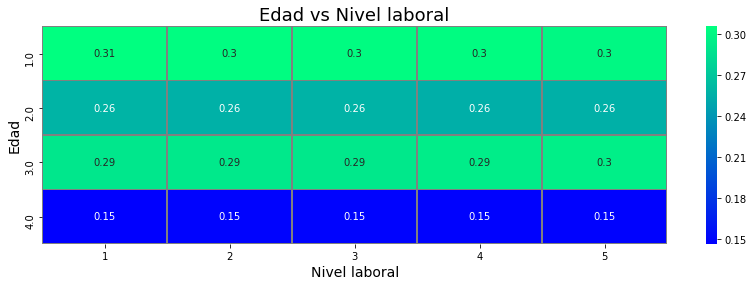

In [90]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(edad_vs_nivel_laboral_no, cmap='winter', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Edad vs Nivel laboral', fontsize=18)
heatmap.set_xlabel('Nivel laboral', fontsize=14)
heatmap.set_ylabel('Edad', fontsize=14)

#### Conclusión

Luego de analizar ambos heatmaps, notamos la siguiente relación inversa bastante marcada:
- Si un postulante tiene entre 41 y 68 años (rango_edad = 4), es bastante probable que se postule a un aviso de gerencia (nivel_laboral = 5)
- Si un postulante no tiene entre 41 y 68 años (rango_edad = 4), es menos probable que se postule a un aviso de gerencia (nivel_laboral = 5)

Creamos entonces el feature que indica esta relación.

In [91]:
relacion = ((modelo['rango_edad'] == 4) & (modelo['nivel_laboral'] == 5))

#modelo.loc[(relacion), 'edad_vs_nivel_laboral'] = 1
#modelo.loc[(~relacion), 'edad_vs_nivel_laboral'] = 0

modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo,estudia_vs_tipo_de_trabajo,edad_vs_tipo_de_trabajo,edad_vs_nivel_laboral
682450,1112313470,GNoJqWe,4.0,1,2.0,0.0,Chofer de camines con CNRT,10,3,3,Transporte,0.0,0.0,0.0,0.0
1335745,1111699098,ZDrJZPR,1.0,1,1.0,0.0,Técnico de microinformática - GBA Zona Norte,10,2,2,Soporte Técnico,0.0,0.0,0.0,0.0
2743757,1112309787,X95WGPK,1.0,2,4.0,1.0,Administrativo/a de facturación y cobranzas,10,3,3,Administración,1.0,0.0,0.0,0.0
1274804,1112212678,ekmL8ar,2.0,1,5.0,1.0,Analista de planificación y abastecimiento,10,3,3,Abastecimiento,0.0,0.0,0.0,0.0
1024985,1112433534,ZDP5vKP,3.0,1,4.0,0.0,Administrativo Contable,10,2,3,Administración,0.0,0.0,0.0,0.0


## Sexo vs Nivel laboral

Sexo:
- 0 = 'NO_DECLARA'
- 1 = 'FEM'
- 2 = 'MASC'

Nivel laboral:
- 1 = Otro
- 2 = Junior
- 3 = Senior / Semi-Senior
- 4 = Jefe / Supervisor / Responsable
- 5 = Gerencia / Alta Gerencia / Dirección

#### Analizamos las postulaciones

In [56]:
sexo_vs_nivel_laboral_si = pd.crosstab(modelo_si['sexo'], modelo_si['nivel_laboral'], normalize='columns')
sexo_vs_nivel_laboral_si

nivel_laboral,1,2,3,4,5
sexo,,,,,
0,0.001798,0.001801,0.001611,0.002328,0.003159
1,0.535792,0.550198,0.516993,0.320391,0.293700
2,0.462409,0.448002,0.481396,0.677280,0.703141


Text(105,0.5,'Sexo')

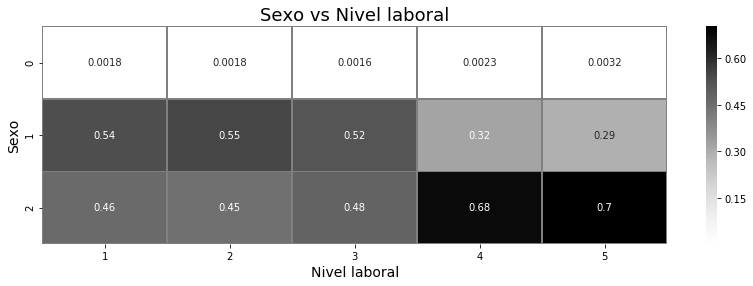

In [67]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(sexo_vs_nivel_laboral_si, cmap='Greys', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Sexo vs Nivel laboral', fontsize=18)
heatmap.set_xlabel('Nivel laboral', fontsize=14)
heatmap.set_ylabel('Sexo', fontsize=14)

#### Analizamos las no postulaciones

In [57]:
sexo_vs_nivel_laboral_no = pd.crosstab(modelo_no['sexo'], modelo_no['nivel_laboral'], normalize='columns')
sexo_vs_nivel_laboral_no

nivel_laboral,1,2,3,4,5
sexo,,,,,
0,0.002233,0.002280,0.002269,0.002138,0.002173
1,0.525374,0.525936,0.525422,0.525319,0.527498
2,0.472393,0.471784,0.472309,0.472543,0.470330


Text(105,0.5,'Sexo')

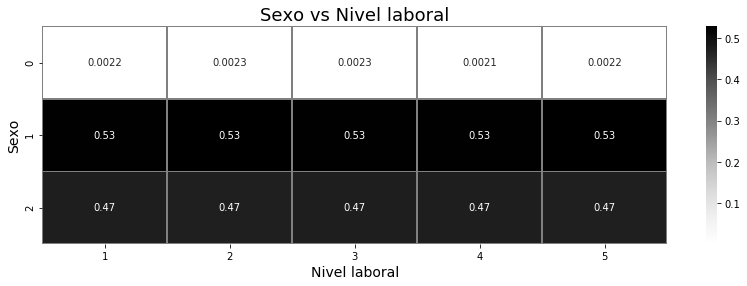

In [68]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(sexo_vs_nivel_laboral_no, cmap='Greys', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Sexo vs Nivel laboral', fontsize=18)
heatmap.set_xlabel('Nivel laboral', fontsize=14)
heatmap.set_ylabel('Sexo', fontsize=14)

#### Conclusión

No encontramos grandes diferencias entre ambos heatmaps. No podemos traducir esto a una relación binaria.

# Relación entre las distintas áreas

La idea es encontrar relaciones fuertes entre las distintas áreas de los avisos laborales. Para esto, comenzamos por analizar las áreas a las que se postuló cada postulante.

Cabe destacar que únicamente nos interesa si el postulante se postuló o no a una cierta área: no influye la cantidad de veces que lo hizo.

In [107]:
# Eliminamos las postulaciones duplicadas de un mismo postulante a una misma área
modelo_areas = modelo_si.drop_duplicates(['idpostulante','nombre_area'])

# Creamos un diccionario del estilo {idpostulante:[areas_a_las_que_se_postulo]}
dic_id_area = {}
for index, row in modelo_areas.iterrows():
    area = row['nombre_area']
    idpostulante = row['idpostulante']
    if (idpostulante not in dic_id_area):
        dic_id_area[idpostulante] = [area]
    else:
        if (area not in dic_id_area[idpostulante]):
            dic_id_area[idpostulante].append(area)

Creamos una lista de listas. Cada sublista contiene las areas a las que se postuló cada postulante. Ya no nos interesa el idpostulante, sino las areas en común.

NOTA: tomamos listas de mas de un elemento y menos de 8, ya que luego calcularemos todas las duplas
posibles para cada lista. Considerar que 7C2 = 21 duplas como máximo por lista.

In [108]:
lista_areas = []
for id in dic_id_area:
    areas = dic_id_area[id]
    if (len(areas) > 1 and len(areas) < 8):
        lista_areas.append(areas)

In [109]:
df_areas = pd.DataFrame({'areas':lista_areas})
df_areas.head(5)

,areas
0,"[Atención al Cliente, Administración, Contabil..."
1,"[Tesorería, Administración, Cadetería]"
2,"[Administración, Recepcionista]"
3,"[Dirección de Obra, Ingeniería Civil]"
4,"[Ventas, Call Center, Atención al Cliente]"


In [110]:
df_areas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136111 entries, 0 to 136110
Data columns (total 1 columns):
areas    136111 non-null object
dtypes: object(1)
memory usage: 1.0+ MB


A continuación, calcularemos todas las duplas posibles para cada lista de áreas y las ordenaremos de mayor a menor por cantidad de apariciones. De esta forma, podremos saber cuáles son las combinaciones de áreas más comunes.

In [111]:
dic_tuplas = {}
contador = 0
for index, row in df_areas.iterrows():
    areas = sorted(row['areas'])
    for area_x in areas:
        indice = areas.index(area_x)
        for area_y in areas[indice+1:]:
            tupla = (area_x, area_y)
            if (tupla not in dic_tuplas):
                dic_tuplas[tupla] = 1
            else:
                dic_tuplas[tupla] += 1

In [112]:
df_tuplas = pd.DataFrame(list(dic_tuplas.items()), columns=['dupla_areas','cantidad'])
df_tuplas = df_tuplas.sort_values(by=['cantidad'], ascending=False).reset_index()
df_tuplas = df_tuplas[['dupla_areas', 'cantidad']]

In [113]:
df_tuplas.head(10)

,dupla_areas,cantidad
0,"(Comercial, Ventas)",20070
1,"(Atención al Cliente, Ventas)",17055
2,"(Call Center, Ventas)",11339
3,"(Administración, Ventas)",11261
4,"(Atención al Cliente, Comercial)",10376
5,"(Atención al Cliente, Call Center)",9956
6,"(Administración, Comercial)",8740
7,"(Recepcionista, Ventas)",8378
8,"(Administración, Atención al Cliente)",8011
9,"(Telemarketing, Ventas)",7994


In [114]:
df_tuplas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8845 entries, 0 to 8844
Data columns (total 2 columns):
dupla_areas    8845 non-null object
cantidad       8845 non-null int64
dtypes: int64(1), object(1)
memory usage: 138.3+ KB


Definimos las áreas más importantes en base a las duplas obtenidas y a información obtenida en la página web de Navent.

In [115]:
top_areas = ['Administración','Ventas','Producción','Call Center','Recepcionista',\
             'Contabilidad','Programación','Recursos Humanos','Gastronomia','Mantenimiento',\
             'Logística','Seguridad','Transporte','Legal','Marketing','Atención al Cliente',\
             'Tecnologia / Sistemas','Medicina','Salud']

In [116]:
len_top_areas = len(top_areas)
len_top_areas

19

Nos guardamos en una lista las áreas restantes.

In [117]:
avisos_detalles = pd.read_csv('datos_navent_fiuba/h15_fiuba_6_avisos_detalle.csv')

avisos_detalles_2 = pd.read_csv('datos_navent_fiuba/d15_fiuba_6_avisos_detalle.csv')

avisos_detalles = pd.merge(avisos_detalles, avisos_detalles_2, how='outer')

avisos_detalles_2 = pd.read_csv('datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

avisos_detalles = pd.merge(avisos_detalles, avisos_detalles_2, how='outer')

avisos_detalles_2 = pd.read_csv('datos_navent_fiuba/fiuba_6_avisos_detalle_missing_nivel_laboral.csv')

avisos_detalles = pd.merge(avisos_detalles, avisos_detalles_2, how='outer')

In [118]:
areas_totales = avisos_detalles['nombre_area'].unique()

In [119]:
len_areas_totales = len(areas_totales)
len_areas_totales

188

In [120]:
areas_restantes = []

for area in areas_totales:
    if area not in top_areas:
        areas_restantes.append(area)

Comprobamos que la cantidad de áreas restantes es la correcta.

In [121]:
len_areas_restantes = len(areas_restantes)

len_areas_restantes == len_areas_totales - len_top_areas

True

Asignamos las áreas restantes a un top_area, según las duplas arriba obtenidas.

In [122]:
contador = 0
asignados = []

# En este diccionario se van a ir cargando las areas que le corresponden a cada top_area
# Va a ser de la pinta dic_area = {top_area:[lista_sub_areas]}
dic_areas = {}
for area in top_areas:
    dic_areas[area] = []
    
    
# Recorremos las tuplas y vamos asignando cada area al top_area que le corresponda
for index, row in df_tuplas.iterrows():
    area1 = row[0][0]
    area2 = row[0][1]

    if (area1 not in top_areas) and (area2 in top_areas):
        if area1 not in asignados:
            dic_areas[area2].append(area1)
            asignados.append(area1)
    
    if (area2 not in top_areas) and (area1 in top_areas):
        if area2 not in asignados:
            dic_areas[area1].append(area2)
            asignados.append(area2)

Comprobamos la cantidad de áreas que efectivamente fueron asignadas a algún top_area.

In [123]:
areas_asignadas = []

for top_area in dic_areas:
    for area in dic_areas[top_area]:
        areas_asignadas.append(area)
        
len(areas_asignadas)

162

Considerando, que tenemos un total de 188 áreas y 19 de ellas son top_areas, nos quedan 7 áreas sin asignar. Las asignamos a la categoría "Otros".

In [124]:
otros = "Otros"

for area in areas_restantes:
    if area not in areas_asignadas:
        if not otros in dic_areas:
            dic_areas[otros] = []
        dic_areas[otros].append(area)            

Comprobamos que efectivamente las 7 áreas sin asignar ahora forman parte de "Otros".

In [125]:
dic_areas[otros]

['Prácticas cardiológicas',
 'Odontología',
 'Fonoaudiología',
 'Esterilización',
 'Traduccion',
 'Enfermería (ver Enfermería)',
 'Auditoría de Seguros']

Asignamos variables numéricas a las áreas del modelo y del test final, según lo analizado arriba.

In [126]:
t0 = time()

otros = "Otros"
n_area = 1    
    
for top_area in dic_areas:
    if (top_area != otros):
        modelo.loc[(modelo['nombre_area'] == top_area), 'num_area'] = n_area
        test_final.loc[(test_final['nombre_area'] == top_area), 'num_area'] = n_area
        for area in dic_areas[top_area]:
            modelo.loc[(modelo['nombre_area'] == area), 'num_area'] = n_area
            test_final.loc[(test_final['nombre_area'] == area), 'num_area'] = n_area
    else:
        modelo.loc[(modelo['nombre_area'] == top_area), 'num_area'] = 0
        test_final.loc[(test_final['nombre_area'] == top_area), 'num_area'] = 0
        
    n_area += 1
    

tf = time() - t0
    
print(tf)

65.38207960128784


In [127]:
modelo['num_area'].value_counts()

2.0     907375
3.0     488513
1.0     486389
17.0    145262
16.0    133423
5.0     133345
8.0     114175
4.0      84931
15.0     81734
6.0      75028
7.0      60896
10.0     58167
11.0     46237
9.0      45146
14.0     27651
0.0      25050
12.0     24749
13.0     24167
19.0     20861
18.0     16257
Name: num_area, dtype: int64

In [128]:
test_final['num_area'].value_counts()

2.0     30898
3.0     17342
1.0     16517
17.0     4606
16.0     4116
8.0      3615
5.0      3555
4.0      3467
15.0     2716
6.0      2212
10.0     1697
11.0     1584
7.0      1573
9.0      1171
12.0     1102
14.0     1077
0.0       846
13.0      746
19.0      635
18.0      495
Name: num_area, dtype: int64

Asignamos a la categoría "Otros" (valor = 0) aquellos valores nulos

In [129]:
modelo['num_area'].isnull().sum()

644

In [130]:
modelo.loc[(modelo['num_area'].isnull()), 'num_area'] = 0

In [131]:
test_final['num_area'].isnull().sum()

30

In [132]:
test_final.loc[(test_final['num_area'].isnull()), 'num_area'] = 0

# Exportamos el modelo final featured

In [133]:
modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo,num_area
2433797,1112298029,NK8JjD,2.0,1,2.0,0.0,Tecnico Quimico- Cañuelas,10,3,3,Química,1.0,3.0
1570659,1112336395,ow2aw24,2.0,2,2.0,0.0,TECNICO Mecánico - Mantenimiento de Maquinaria...,10,3,3,Mantenimiento,1.0,10.0
824645,1112470846,kPXWEZ0,1.0,2,4.0,1.0,Vendedor/a,10,3,3,Ventas,0.0,2.0
2181042,1112312178,KBzLNGQ,1.0,1,4.0,0.0,Talent Acquisition - E-commerce Líder en la re...,10,3,3,Selección,1.0,8.0
693288,1112281495,wVoQw2Z,1.0,1,2.0,0.0,"Jefe de Higiene, Seguridad y Medioambiente",10,3,3,Otros,0.0,0.0


In [134]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 13 columns):
idaviso            int64
idpostulante       object
rango_edad         float64
sexo               int64
nivel_estudios     float64
esta_estudiando    float64
titulo             object
tipo_de_trabajo    int64
nivel_laboral      int64
nombre_zona        int64
nombre_area        object
sepostulo          float64
num_area           float64
dtypes: float64(5), int64(5), object(3)
memory usage: 297.5+ MB


In [135]:
modelo['rango_edad'] = modelo['rango_edad'].astype('category')
modelo['sexo'] = modelo['sexo'].astype('category') 
modelo['nivel_estudios'] = modelo['nivel_estudios'].astype('category')
modelo['esta_estudiando'] = modelo['esta_estudiando'].astype('category')
modelo['tipo_de_trabajo'] = modelo['tipo_de_trabajo'].astype('category')
modelo['nivel_laboral'] = modelo['nivel_laboral'].astype('category')
modelo['nombre_zona'] = modelo['nombre_zona'].astype('category')
modelo['num_area'] = modelo['num_area'].astype('category')
modelo['sepostulo'] = modelo['sepostulo'].astype('category')

In [136]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 13 columns):
idaviso            int64
idpostulante       object
rango_edad         category
sexo               category
nivel_estudios     category
esta_estudiando    category
titulo             object
tipo_de_trabajo    category
nivel_laboral      category
nombre_zona        category
nombre_area        object
sepostulo          category
num_area           category
dtypes: category(9), int64(1), object(3)
memory usage: 117.3+ MB


In [137]:
modelo.to_csv('csv_files/modelo_final_featured.csv', encoding='utf-8', index=False)

# Exportamos el test final featured

In [138]:
test_final.sample(5)

,id,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,num_area
20784,20784,1112263307,N5d8WM,4.0,2.0,4.0,1.0,10,1,3,Ventas,2.0
69804,69804,1112461553,xkvWw5P,1.0,2.0,3.0,0.0,10,2,3,Administración,1.0
12409,12409,1112000785,EBzbwo,4.0,1.0,4.0,0.0,10,3,3,Ventas,2.0
65820,65820,1112458856,bO44Bxb,1.0,2.0,4.0,1.0,10,3,3,Ventas,2.0
63090,63090,1112457238,xkvLm3K,2.0,2.0,2.0,0.0,10,0,2,Ventas,2.0


In [139]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
id                 100000 non-null int64
idaviso            100000 non-null int64
idpostulante       100000 non-null object
rango_edad         100000 non-null float64
sexo               100000 non-null float64
nivel_estudios     100000 non-null float64
esta_estudiando    100000 non-null float64
tipo_de_trabajo    100000 non-null int64
nivel_laboral      100000 non-null int64
nombre_zona        100000 non-null object
nombre_area        100000 non-null object
num_area           100000 non-null float64
dtypes: float64(5), int64(4), object(3)
memory usage: 9.2+ MB


In [141]:
test_final['rango_edad'] = test_final['rango_edad'].astype('category')
test_final['sexo'] = test_final['sexo'].astype('category') 
test_final['nivel_estudios'] = test_final['nivel_estudios'].astype('category')
test_final['esta_estudiando'] = test_final['esta_estudiando'].astype('category')
test_final['tipo_de_trabajo'] = test_final['tipo_de_trabajo'].astype('category')
test_final['nivel_laboral'] = test_final['nivel_laboral'].astype('category')
test_final['nombre_zona'] = test_final['nombre_zona'].astype('category')
test_final['num_area'] = test_final['num_area'].astype('category')

In [142]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
id                 100000 non-null int64
idaviso            100000 non-null int64
idpostulante       100000 non-null object
rango_edad         100000 non-null category
sexo               100000 non-null category
nivel_estudios     100000 non-null category
esta_estudiando    100000 non-null category
tipo_de_trabajo    100000 non-null category
nivel_laboral      100000 non-null category
nombre_zona        100000 non-null category
nombre_area        100000 non-null object
num_area           100000 non-null category
dtypes: category(8), int64(2), object(2)
memory usage: 3.8+ MB


In [143]:
test_final.to_csv('csv_files/test_final_featured.csv', encoding='utf-8', index=False)